# Setup

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('datasets/processed/train.csv')
X_train, y_train = train.drop(['satisfaction'], axis=1), train['satisfaction']

validation = pd.read_csv('datasets/processed/validation.csv')
X_validation, y_validation = validation.drop(['satisfaction'], axis=1), validation['satisfaction']

test = pd.read_csv('datasets/processed/test.csv')
X_test, y_test = test.drop(['satisfaction'], axis=1), test['satisfaction']

# Correlação das variáveis

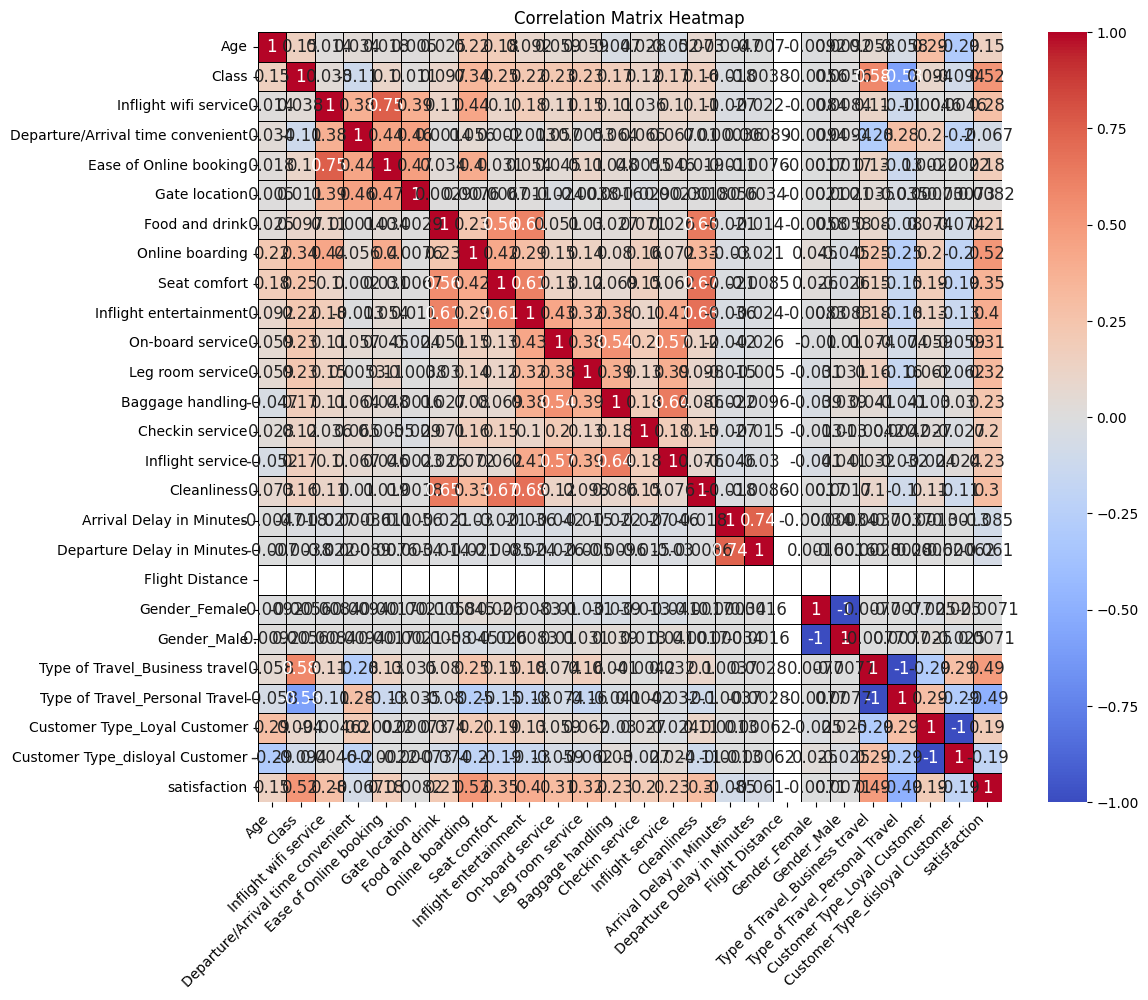

In [19]:
correlation_matrix = train.corr()

plt.figure(figsize=(12, 10))  # Increase the size of the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0, 
    linewidths=0.5, 
    linecolor='black',
    annot_kws={"size": 12}  # Adjust the font size
)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Correlation Matrix Heatmap')
plt.show()

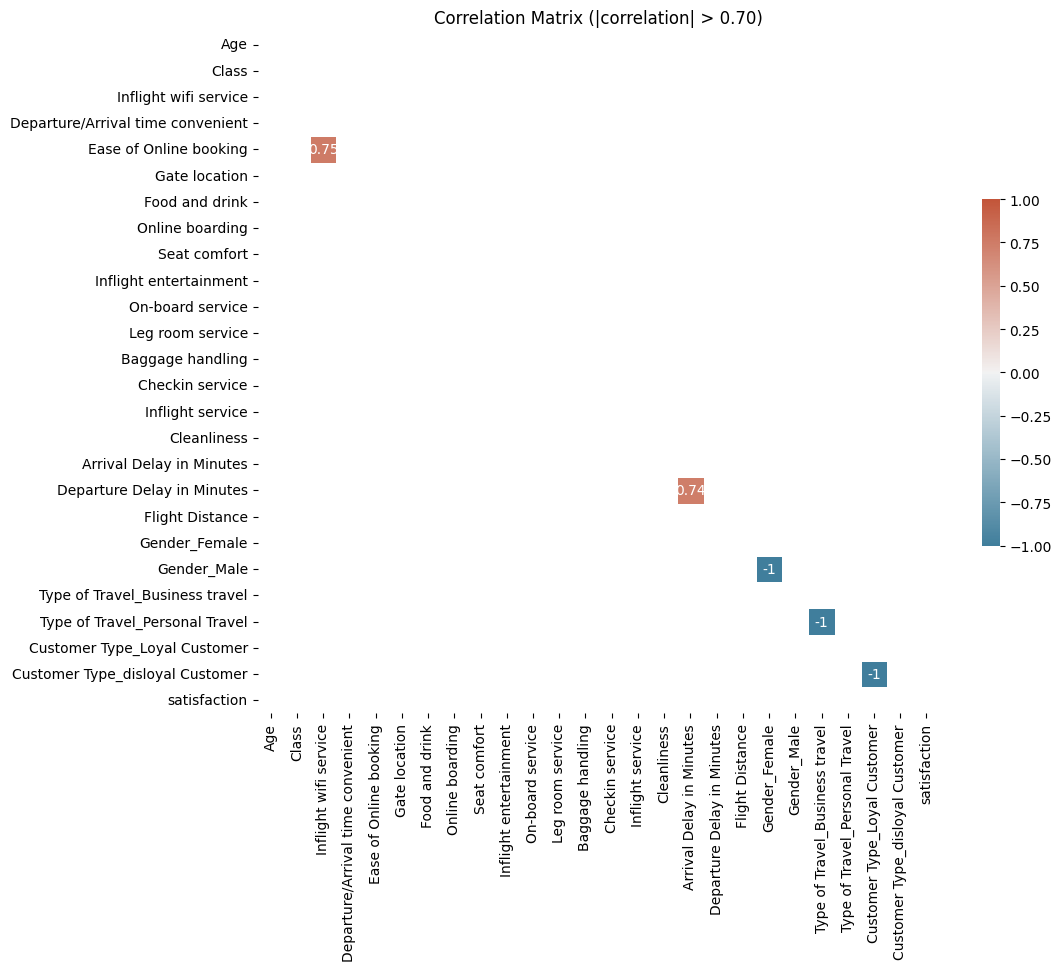

In [21]:
# Filter correlations to show only those > 0.70 or < -0.70
filtered_corr_matrix = correlation_matrix.mask((correlation_matrix <= 0.70) & (correlation_matrix >= -0.70))

# Mask to remove the upper triangle
mask = np.triu(np.ones_like(filtered_corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(filtered_corr_matrix, mask=mask, cmap=cmap, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)

plt.title('Correlation Matrix (|correlation| > 0.70)')
plt.show()


# Feature Importance do RF

In [3]:
model = RandomForestClassifier(
        n_estimators=148,
        max_depth=24,
        max_features=10,
        min_samples_leaf=1,
        random_state=42
    )

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=24, max_features=10, n_estimators=148,
                       random_state=42)

In [4]:
feature_importances = model.feature_importances_

# Assuming X is a DataFrame
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


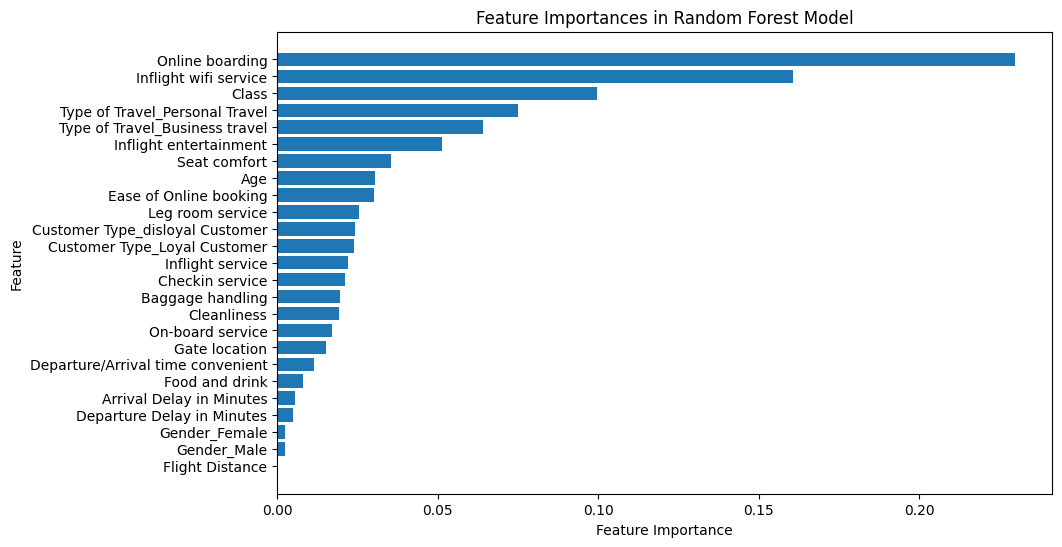

In [5]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# Novos datasets

In [1]:
drop_columns = ['Flight Distance', 
                'Gender_Female', 
                'Gender_Male', 
                'Arrival Delay in Minutes', 
                'Departure Delay in Minutes',
                'Departure/Arrival time convenient']

In [8]:
truncated_train = train.drop(drop_columns, axis=1)

truncated_validation = validation.drop(drop_columns, axis=1)

truncated_test = test.drop(drop_columns, axis=1)

In [12]:
truncated_train.to_csv('datasets/importance/train.csv', index=False)
truncated_validation.to_csv('datasets/importance/validation.csv', index=False)
truncated_test.to_csv('datasets/importance/test.csv', index=False)